# Load data into Spark DataFrame

In [2]:
sc.stop()

In [1]:
## test spark function
import findspark
findspark.init()
import pyspark
import random
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000
def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
#sc.stop()

3.14139232


In [5]:
from pyspark import SparkContext, SQLContext

In [6]:
import pyspark.sql.functions as F

In [7]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [8]:
#sc.stop()

In [9]:
#spark = SparkContext()

In [10]:
sql = SQLContext(sc)

In [13]:
#sc = pyspark.SparkContext(appName="Pi")

In [57]:
df = sql.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [58]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168530895|    P|       0|2017-03-30|
|168551310|    P| 7149583|2017-03-30|
|168548714|    P|23492572|2017-03-30|
|168535909|    P| 7145935|2017-03-30|
|168551542|    P| 8762277|2017-03-30|
|168538990|    P| 6369563|2017-03-30|
|168551414|    P|  727162|2017-03-30|
|168543049|    P|  347730|2017-03-30|
|168551357|    P|23497506|2017-03-30|
|168551539|    P| 1217815|2017-03-30|
|168551113|    P| 6491838|2017-03-30|
|168550352|    P|       0|2017-03-30|
|168543049|    P|  126344|2017-03-30|
|168550838|    P|   99018|2017-03-30|
|168548714|    P|23490801|2017-03-30|
|168537049|    P|  294622|2017-03-30|
|168551118|    P|  197705|2017-03-30|
|168548714|    P|23490755|2017-03-30|
|168550245|    P|  203174|2017-03-30|
|168539391|    P|22809552|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [59]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [60]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168530895|    P|       0|2017-03-30|
|168551310|    P| 7149583|2017-03-30|
|168548714|    P|23492572|2017-03-30|
|168535909|    P| 7145935|2017-03-30|
|168551542|    P| 8762277|2017-03-30|
|168538990|    P| 6369563|2017-03-30|
|168551414|    P|  727162|2017-03-30|
|168543049|    P|  347730|2017-03-30|
|168551357|    P|23497506|2017-03-30|
|168551539|    P| 1217815|2017-03-30|
|168551113|    P| 6491838|2017-03-30|
|168550352|    P|       0|2017-03-30|
|168543049|    P|  126344|2017-03-30|
|168550838|    P|   99018|2017-03-30|
|168548714|    P|23490801|2017-03-30|
|168537049|    P|  294622|2017-03-30|
|168551118|    P|  197705|2017-03-30|
|168548714|    P|23490755|2017-03-30|
|168550245|    P|  203174|2017-03-30|
|168539391|    P|22809552|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [61]:
# simple count rows
df.count()

12155222

In [62]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59057

In [63]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  610855|
|    S|  771161|
|    P|10773206|
+-----+--------+



In [64]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  610855|99556827|
|    S|  771161|99440434|
|    P|10773206|99556827|
+-----+--------+--------+



In [65]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 29084|
|2017-04-01|    P|497668|
|2017-04-01|    S| 33417|
|2017-04-02|    D| 23793|
|2017-04-02|    P|442947|
|2017-04-02|    S| 30569|
|2017-04-03|    D| 19659|
|2017-04-03|    P|256099|
|2017-04-03|    S| 26695|
|2017-04-04|    D| 19706|
|2017-04-04|    P|381646|
|2017-04-04|    S| 24143|
|2017-04-05|    D| 15693|
|2017-04-05|    P|302384|
|2017-04-05|    S| 20805|
+----------+-----+------+



In [66]:
date_count = df.groupBy('date').count().toPandas()

In [67]:
date_count.head()

,date,count
0,2017-04-09,325308
1,2017-05-11,185674
2,2017-04-25,222119
3,2017-04-03,302453
4,2017-04-29,230113


In [68]:
type(date_count['count'][0])

numpy.int64

In [69]:
date_count['count'] = date_count['count'].astype('int64')

In [70]:
from matplotlib.dates import date2num       #-->Update

In [71]:
date_count['date_f'] = date_count['date'].apply(date2num)

(array([736410., 736420., 736430., 736440., 736450., 736460., 736470.]),
 <a list of 7 Text xticklabel objects>)

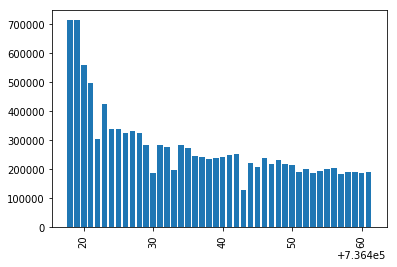

In [72]:
plt.bar(x = date_count['date_f'],height = date_count['count'])
plt.xticks(rotation='vertical')

In [73]:
date_count.head()

,date,count,date_f
0,2017-04-09,325308,736428.0
1,2017-05-11,185674,736460.0
2,2017-04-25,222119,736444.0
3,2017-04-03,302453,736422.0
4,2017-04-29,230113,736448.0


# Label definition

In [74]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [79]:
df.limit(10).toPandas()

,uid,event,song_id,date
0,168530895,P,0,2017-03-30
1,168551310,P,7149583,2017-03-30
2,168548714,P,23492572,2017-03-30
3,168535909,P,7145935,2017-03-30
4,168551542,P,8762277,2017-03-30
5,168538990,P,6369563,2017-03-30
6,168551414,P,727162,2017-03-30
7,168543049,P,347730,2017-03-30
8,168551357,P,23497506,2017-03-30
9,168551539,P,1217815,2017-03-30


In [75]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [76]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [77]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|35951|
|    0|21829|
+-----+-----+



# Feature generation

In [80]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [81]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [82]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [83]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167777847|            5|
|167587246|            7|
|168318204|            4|
|167917924|            3|
|167677091|            1|
+---------+-------------+
only showing top 5 rows



In [84]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [85]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [86]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [87]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167587246|            6|            7|           21|            37|            75|
|168000523|            0|            0|            0|            33|            43|
|167753093|            0|            0|            6|             7|            27|
|168000255|            0|            0|           51|            68|            72|
|167785178|            0|            0|            0|             0|             6|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [312]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [313]:
df_feature_list[1].columns

['uid',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30']

In [314]:
df_feature_list[0].columns

['uid',
 'freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30']

In [315]:
df_feature_list[0].count(), df_feature_list[1].count()

(57660, 22677)

## Recency features

In [316]:
# defined as days from last event
# can generate one feature for each type of event
## days from last P, S, D
df.take(10)

[Row(uid='168530895', event='P', song_id='0', date=datetime.date(2017, 3, 30)),
 Row(uid='168551310', event='P', song_id='7149583', date=datetime.date(2017, 3, 30)),
 Row(uid='168548714', event='P', song_id='23492572', date=datetime.date(2017, 3, 30)),
 Row(uid='168535909', event='P', song_id='7145935', date=datetime.date(2017, 3, 30)),
 Row(uid='168551542', event='P', song_id='8762277', date=datetime.date(2017, 3, 30)),
 Row(uid='168538990', event='P', song_id='6369563', date=datetime.date(2017, 3, 30)),
 Row(uid='168551414', event='P', song_id='727162', date=datetime.date(2017, 3, 30)),
 Row(uid='168543049', event='P', song_id='347730', date=datetime.date(2017, 3, 30)),
 Row(uid='168551357', event='P', song_id='23497506', date=datetime.date(2017, 3, 30)),
 Row(uid='168551539', event='P', song_id='1217815', date=datetime.date(2017, 3, 30))]

In [317]:
from pyspark.sql import Window

In [318]:
mywindow = Window.partitionBy(['uid', 'event']).orderBy('date')

In [319]:
df.withColumn('date_limit', F.row_number().over(mywindow)).take(10)

[Row(uid='121992096', event='P', song_id='21767178', date=datetime.date(2017, 3, 31), date_limit=1),
 Row(uid='121992096', event='P', song_id='93157', date=datetime.date(2017, 3, 31), date_limit=2),
 Row(uid='121992096', event='P', song_id='6239982', date=datetime.date(2017, 3, 31), date_limit=3),
 Row(uid='121992096', event='P', song_id='5655943', date=datetime.date(2017, 3, 31), date_limit=4),
 Row(uid='121992096', event='P', song_id='5235212', date=datetime.date(2017, 3, 31), date_limit=5),
 Row(uid='121992096', event='P', song_id='5655943', date=datetime.date(2017, 3, 31), date_limit=6),
 Row(uid='121992096', event='P', song_id='6239982', date=datetime.date(2017, 3, 31), date_limit=7),
 Row(uid='121992096', event='P', song_id='4206477', date=datetime.date(2017, 3, 31), date_limit=8),
 Row(uid='121992096', event='P', song_id='643093', date=datetime.date(2017, 3, 31), date_limit=9),
 Row(uid='121992096', event='P', song_id='4206477', date=datetime.date(2017, 3, 31), date_limit=10)]

##### Only SELECT last time event

In [320]:
df_last_two = df.withColumn('date_limit', F.row_number().over(mywindow))\
.filter(F.col('date_limit') < 3)

In [321]:
df_last_two = df_last_two\
.withColumn('prev_date', F.lag(df_last_two['date']).over(Window.partitionBy('uid').orderBy('date')))

In [322]:
df_last_two.count()

220039

In [323]:
df_last_two.where(F.col("prev_date").isNotNull()).count()


160982

##### Filter prev_date is None

In [324]:
df_last_two = df_last_two.where(F.col("date_limit")== 2)

##### calculate

In [325]:
df_last_two.count()

102288

In [326]:
df_last_two.registerTempTable('mydata')

In [327]:
sql.sql('SELECT *, datediff(date, prev_date) as diff from mydata').limit(10).toPandas()

,uid,event,song_id,date,date_limit,prev_date,diff
0,149292492,P,0,2017-03-30,2,2017-03-30,0
1,158837803,P,0,2017-03-30,2,2017-03-30,0
2,162228038,P,226587,2017-04-27,2,2017-04-03,24
3,165988992,P,1063729,2017-03-31,2,2017-03-31,0
4,165988992,S,None,2017-04-21,2,2017-04-21,0
5,165988992,D,9950164,2017-04-21,2,2017-04-21,0
6,167181628,D,18747887,2017-04-05,2,2017-04-05,0
7,167181628,P,7163925,2017-04-07,2,2017-04-07,0
8,167587246,D,2833089,2017-03-30,2,2017-03-30,0
9,167587246,S,None,2017-03-30,2,2017-03-30,0


##### SELECT and join them altogether

In [328]:
df_last_two_diff = sql.sql('SELECT *, datediff(date, prev_date) as diff from mydata')

In [329]:
df_last_two_diff

DataFrame[uid: string, event: string, song_id: string, date: date, date_limit: int, prev_date: date, diff: int]

In [330]:
df_last_two_diff.filter(F.col('event') == 'P').registerTempTable('lastP')

In [331]:
df_last_two_diff.filter(F.col('event') == 'D').registerTempTable('lastD')

In [332]:
df_last_two_diff.filter(F.col('event') == 'S').registerTempTable('lastS')

In [333]:
last_P = sql.sql('SELECT distinct uid, diff as days_fr_last_p from lastP')

In [334]:
last_D = sql.sql('SELECT distinct uid, diff as days_fr_last_d from lastD')
last_S = sql.sql('SELECT distinct uid, diff as days_fr_last_s from lastS')

In [335]:
last_P.count()

53869

In [336]:
last_D.count(), last_S.count()

(18910, 29509)

In [337]:
#myjoin_1 = last_P.join(last_S, on = 'uid', how = 'left')

In [338]:
#myjoin_2 = myjoin_1.join(last_D, on = 'uid', how = 'left')

In [339]:
#myjoin_2  ## this includes all the recency features

In [294]:
myjoin_2.orderBy(F.col('days_fr_last_p').desc()).take(10)

[Row(uid='168730564', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=None),
 Row(uid='168594721', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=None),
 Row(uid='168768875', days_fr_last_p=43, days_fr_last_s=0, days_fr_last_d=None),
 Row(uid='168257194', days_fr_last_p=43, days_fr_last_s=0, days_fr_last_d=None),
 Row(uid='168225229', days_fr_last_p=43, days_fr_last_s=0, days_fr_last_d=None),
 Row(uid='168193672', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=0),
 Row(uid='168729815', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=0),
 Row(uid='168593546', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=None),
 Row(uid='169037032', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=None),
 Row(uid='168395269', days_fr_last_p=43, days_fr_last_s=None, days_fr_last_d=0)]

In [295]:
#df_feature_list = df_feature_list[:3]

In [340]:
for i in [last_D, last_P, last_S]:
    df_feature_list.append(i)

In [341]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint],
 DataFrame[uid: string, days_fr_last_d: int],
 DataFrame[uid: string, days_fr_last_p: int],
 DataFrame[uid: string, days_fr_last_s: int]]

### Profile features

In [342]:
df_play = sql.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168530895|    ar|       0|2017-03-30|      264|        265|
|168551310|    ar| 7149583|2017-03-30|       29|        215|
|168548714|    ar|23492572|2017-03-30|        2|        359|
|168535909|    ar| 7145935|2017-03-30|      130|        130|
|168551542|    ar| 8762277|2017-03-30|      120|        232|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [343]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [344]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|50365|
|    ip| 7307|
+------+-----+



In [345]:
# check if one user has two devices
df_profile_tmp.count()

57672

In [346]:
df_profile_tmp.distinct().count()

57672

In [347]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7307|
|          2|50365|
+-----------+-----+



In [348]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  120|
|          1| 7307|
|          2|50365|
+-----------+-----+



In [349]:
df_profile.count()

57792

In [350]:
df_profile.limit(10).toPandas()

,uid,device_type
0,149292492,2
1,158837803,2
2,162228038,2
3,165988992,2
4,167181628,2
5,167577418,2
6,167587246,2
7,167590080,2
8,167594294,2
9,167604097,2


In [307]:
#df_feature_list = df_feature_list.append(df_profile)

In [351]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint],
 DataFrame[uid: string, days_fr_last_d: int],
 DataFrame[uid: string, days_fr_last_p: int],
 DataFrame[uid: string, days_fr_last_s: int]]

### Total play time features

In [ ]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)


### Fancier frequency features

In [ ]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)


# Form training data

In [352]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [353]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [354]:
df_model_final

DataFrame[uid: string, label: int, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint, days_fr_last_d: int, days_fr_last_p: int, days_fr_last_s: int]

In [355]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [356]:
df_model_final

DataFrame[uid: string, label: int, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint, days_fr_last_d: int, days_fr_last_p: int, days_fr_last_s: int, device_type: int]

In [366]:
fillna_dic = dict()

In [372]:
for i in df_model_final.columns:
    fillna_dic.update({i:0})

In [376]:
fillna_dic['days_fr_last_d'] = 99
fillna_dic['days_fr_last_s'] = 99
fillna_dic['days_fr_last_p'] = 99
fillna_dic

{'uid': 0,
 'label': 0,
 'freq_P_last_1': 0,
 'freq_P_last_3': 0,
 'freq_P_last_7': 0,
 'freq_P_last_14': 0,
 'freq_P_last_30': 0,
 'freq_D_last_1': 0,
 'freq_D_last_3': 0,
 'freq_D_last_7': 0,
 'freq_D_last_14': 0,
 'freq_D_last_30': 0,
 'freq_S_last_1': 0,
 'freq_S_last_3': 0,
 'freq_S_last_7': 0,
 'freq_S_last_14': 0,
 'freq_S_last_30': 0,
 'days_fr_last_d': 99,
 'days_fr_last_p': 99,
 'days_fr_last_s': 99,
 'device_type': 0}

In [377]:
df_model_final.fillna(fillna_dic).toPandas().to_csv('../data/df_model_final.csv',index=False)